In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_data.csv")

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


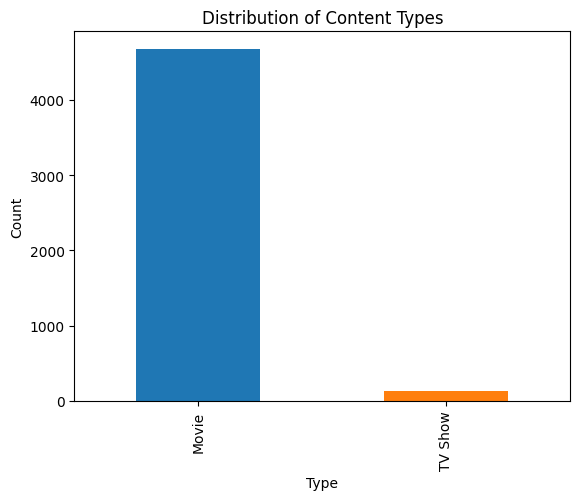

In [ ]:
content_type_counts = netflix_df['type'].value_counts()
content_type_counts.plot(kind='bar', title='Distribution of Content Types', xlabel='Type', ylabel='Count', color=['#1f77b4', '#ff7f0e'])
plt.show()

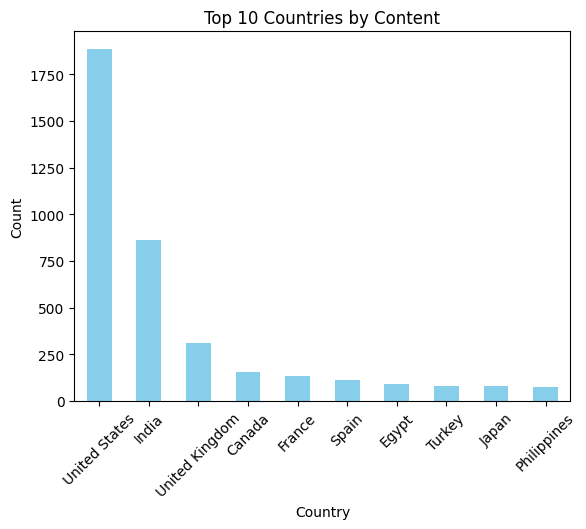

In [ ]:
country_counts = netflix_df['country'].value_counts().head(10)
country_counts.plot(kind='bar', title='Top 10 Countries by Content', xlabel='Country', ylabel='Count', color='skyblue')
plt.xticks(rotation=45)
plt.show()

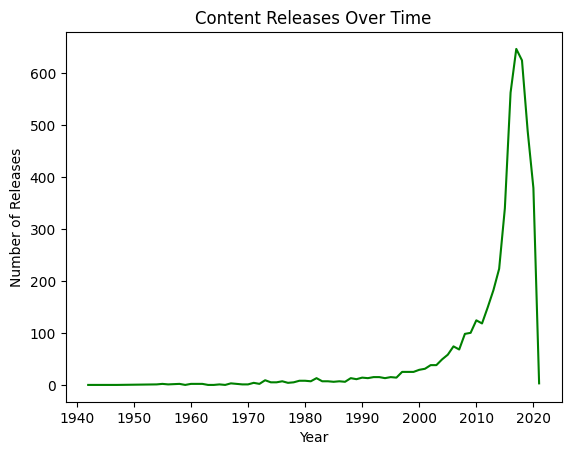

In [ ]:
release_year_counts = netflix_df['release_year'].value_counts().sort_index()
release_year_counts.plot(kind='line', title='Content Releases Over Time', xlabel='Year', ylabel='Number of Releases', color='green')
plt.show()

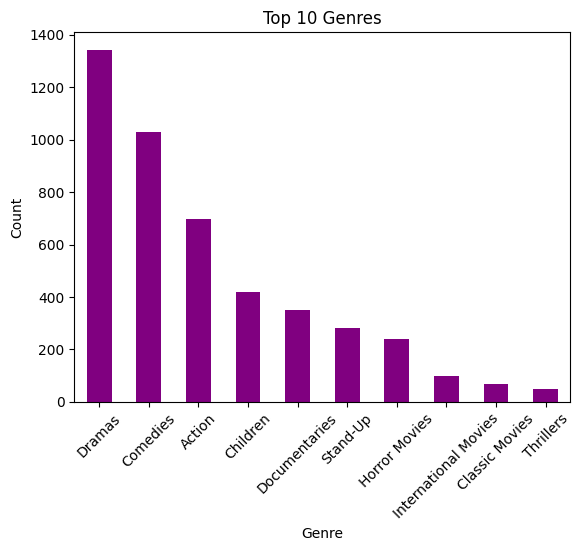

In [ ]:
from collections import Counter

genre_series = netflix_df['genre'].dropna().apply(lambda x: x.split(','))
genre_list = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts = Counter(genre_list)

pd.Series(genre_counts).nlargest(10).plot(kind='bar', title='Top 10 Genres', xlabel='Genre', ylabel='Count', color='purple')
plt.xticks(rotation=45)
plt.show()

In [ ]:
movies_1990s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000) & (netflix_df['type'] == 'Movie')]

duration = movies_1990s['duration'].mode()[0]

action_movies_1990s = movies_1990s[movies_1990s['genre'].str.contains('Action', na=False)]
short_movie_count = action_movies_1990s[action_movies_1990s['duration'] < 90].shape[0]

duration, short_movie_count

(np.int64(94), 7)